In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [47]:
df = pd.read_csv("./WHO-COVID-19-Iran-data.csv")

In [48]:
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,IR,Iran (Islamic Republic of),EMRO,0,0,0,0
1,2020-01-04,IR,Iran (Islamic Republic of),EMRO,0,0,0,0
2,2020-01-05,IR,Iran (Islamic Republic of),EMRO,0,0,0,0
3,2020-01-06,IR,Iran (Islamic Republic of),EMRO,0,0,0,0
4,2020-01-07,IR,Iran (Islamic Republic of),EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
274,2020-10-03,IR,Iran (Islamic Republic of),EMRO,3552,464596,187,26567
275,2020-10-04,IR,Iran (Islamic Republic of),EMRO,3523,468119,179,26746
276,2020-10-05,IR,Iran (Islamic Republic of),EMRO,3653,471772,211,26957
277,2020-10-06,IR,Iran (Islamic Republic of),EMRO,3902,475674,235,27192


In [49]:
df = df[df.index>46].reset_index(drop=True)

In [50]:
df.drop(columns=[' Country_code',' Country',' WHO_region', ' New_deaths', ' Cumulative_deaths'],inplace=True)

In [51]:
df

,Date_reported,New_cases,Cumulative_cases
0,2020-02-19,6,6
1,2020-02-20,3,9
2,2020-02-21,13,22
3,2020-02-22,10,32
4,2020-02-23,15,47
...,...,...,...
227,2020-10-03,3552,464596
228,2020-10-04,3523,468119
229,2020-10-05,3653,471772
230,2020-10-06,3902,475674


In [52]:
t = np.array(df[' New_cases'].values, int)

In [487]:
x = np.array(range(len(t)))

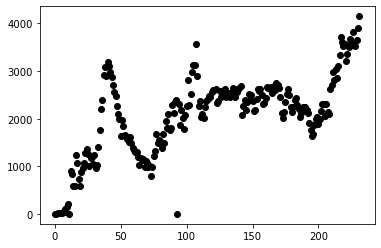

In [112]:
plt.scatter(x, t, color='black')

# مدل خطی

### مدل زیر به اصطلاح استیت آف آرت هست که میخواهیم به آن برسیم

In [113]:
model = np.polyfit(x, t, 1)

In [114]:
y = np.multiply(model[0],x) + model[1]

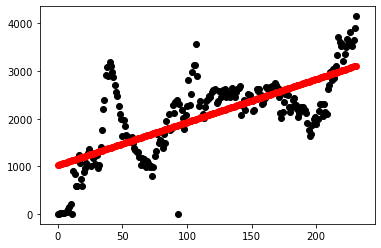

In [115]:
plt.scatter(x, t, color='black')
plt.scatter(x, y, color='red')

## از اینجا شروع به ساختن مدل خود کرده ام

In [203]:
def train(x, t, alpha, epochs):
    w, b = 0,0
    m = len(x)
    for e in range(epochs):
        y = np.dot(x, w) + b
        loss = (y-t)
        cost = np.sum(loss**2) / (2 * m)
#         print("epoch: %d | Cost: %f" % (e, cost))
#         plt.scatter(x, t, color='black')
#         plt.scatter(x, y, color='red')
#         plt.show()
#         print(e, w, b)
        gradient = np.dot(x.transpose(), loss) / m
        w = w - alpha * gradient
        b = b - alpha * 1000 * (np.sum(loss) / m)
    return w,b

#### برای نمایش شکل ها و روند بهبود مدل می توانید خط های کامنت شده را به تابع بالا اضافه کنید

epoch: 0 | Cost: 2506097.618534


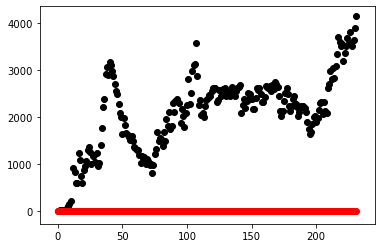

0 0 0
epoch: 1 | Cost: 1918096.838822


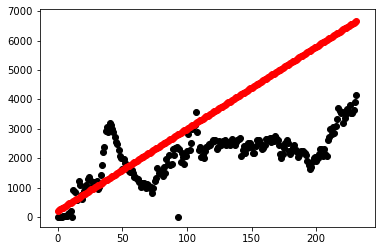

1 27.948406034482762 206.82112068965517
epoch: 2 | Cost: 1483710.403953


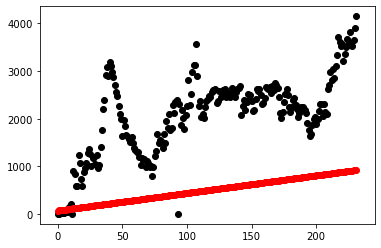

2 3.688596948232753 70.15603961206895
epoch: 3 | Cost: 1162571.360982


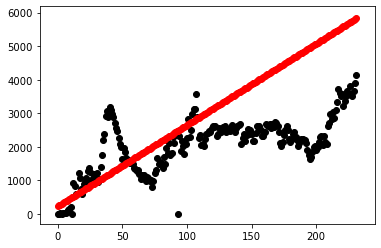

3 24.251592235123827 227.35826158842892
epoch: 4 | Cost: 924931.738492


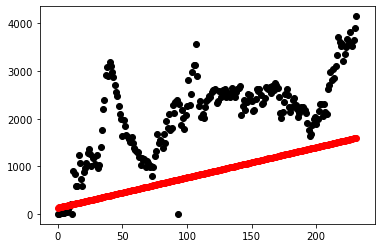

4 6.344334609540255 131.33766580356098
epoch: 5 | Cost: 748868.563999


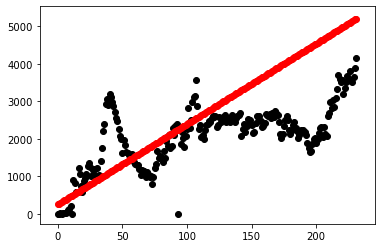

5 21.466696945755903 251.74795517267012
epoch: 6 | Cost: 618225.037756


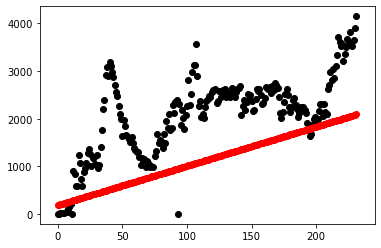

6 8.241953457337138 185.4539306215776
epoch: 7 | Cost: 521093.426410


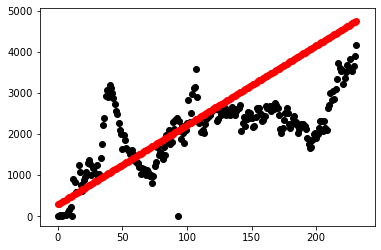

7 19.35667245776436 278.5350958168311
epoch: 8 | Cost: 448697.137597


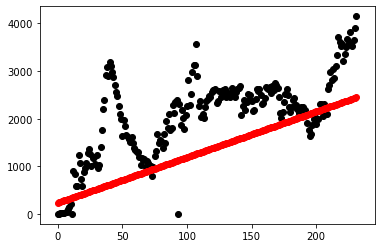

8 9.58376164597486 233.93314003762475
epoch: 9 | Cost: 394566.941927


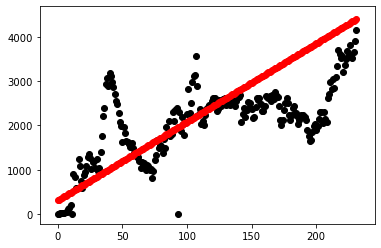

9 17.746705590990565 306.6684997125078
epoch: 10 | Cost: 353933.945503


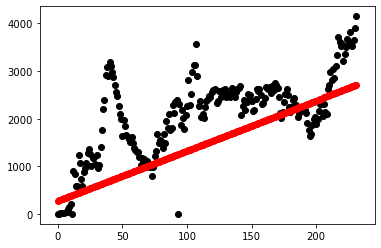

10 10.518700402573627 277.8483208549712
epoch: 11 | Cost: 323282.281103


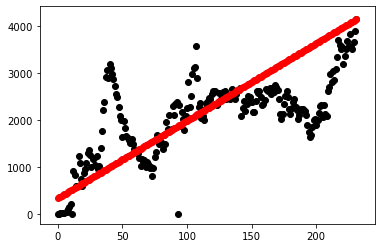

11 16.50784892857385 335.39361980940384
epoch: 12 | Cost: 300019.492499


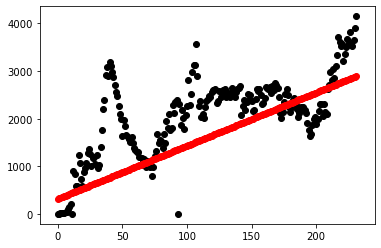

12 11.156392546628677 318.00972339309067
epoch: 13 | Cost: 282233.644324


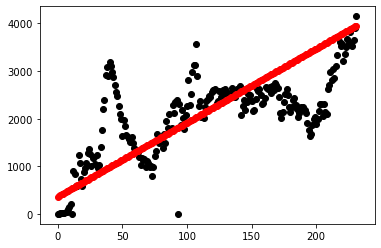

13 15.544958741928292 364.17353782987556
epoch: 14 | Cost: 268514.338141


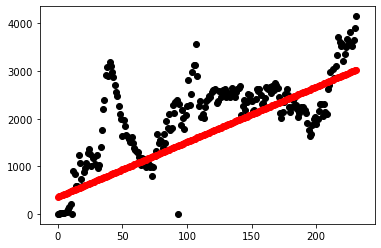

14 11.57749420905171 355.0330312672714
epoch: 15 | Cost: 257820.819701


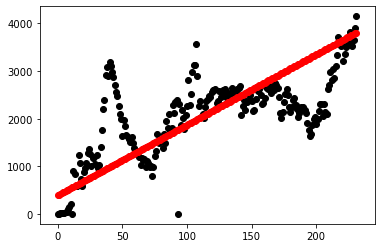

15 14.787806430052358 392.63079071565215
epoch: 16 | Cost: 249384.786764


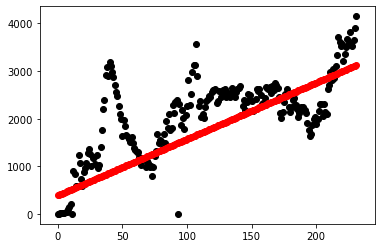

16 11.841322479879505 389.3896680666374
epoch: 17 | Cost: 242638.767118


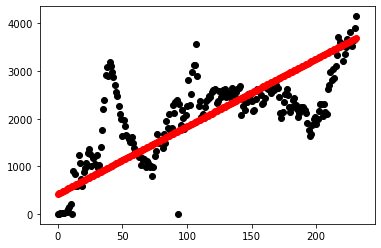

17 14.184528461683389 420.5045473070205
epoch: 18 | Cost: 237163.338850


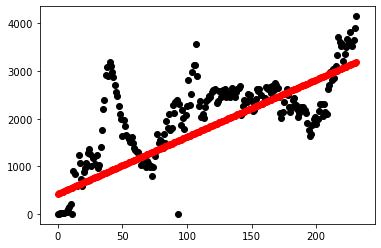

18 11.991475765396336 421.44390953353053
epoch: 19 | Cost: 232648.235171


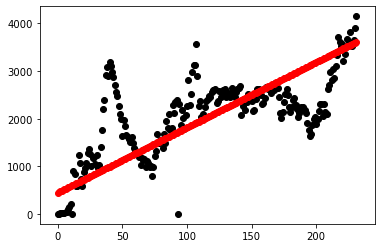

19 13.696799519159578 447.61909417950494


(12.059975032991149, 451.4802710049165)

In [201]:
train(x,t, 0.0001, 20)

# بهترین دقت بعد از 1000 بار بهبود مدل

In [205]:
w, b = train(x,t, 0.0001, 1000)

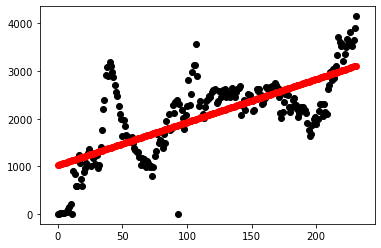

In [206]:
y = np.dot(x, w) + b
plt.scatter(x, t, color='black')
plt.scatter(x, y, color='red')

# مدل چند جمله ای

#### ابتدا نمونه برداری و تقسیم داده ها

In [491]:
train_set, val_set, test_set =  np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
sets = [train_set, val_set, test_set]
for s in sets:
    s.sort_index(inplace=True)

#### طبق گفته ی استاد به نسبت 60 20 20 داده ها تفکیک شده اند

#### در شکل زیر تفکیک داده ها را می بینید که دارای توزیع یکسانی اند

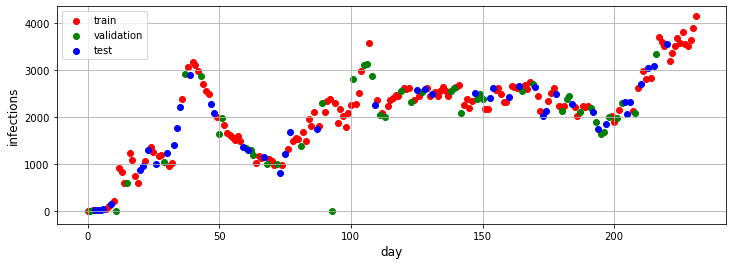

In [518]:
plt.figure(figsize=(12,4))
plt.scatter(train_set.index.values,np.array(train_set[' New_cases'].values, int),color = "red",
        label = "train")
plt.scatter(val_set.index.values,np.array(val_set[' New_cases'].values, int),color = "green",
        label = "validation")
plt.scatter(test_set.index.values,np.array(test_set[' New_cases'].values, int),color = "blue",
        label = "test")
plt.legend()
plt.xlabel('day', fontsize=12)
plt.ylabel('infections', fontsize=12)
plt.grid()
plt.show()

#### به دلیل وجود توان های بالا برای ورودی ها آن ها را نرمالایز می کنم تا استک اورفلو رخ ندهد

In [579]:
y_train = np.array(train_set[' New_cases']).reshape(len(train_set),1)
x_train = (np.array(range(len(y_train)))/len(y_train)).reshape(len(y_train),1)
y_val = np.array(val_set[' New_cases']).reshape(len(val_set),1)
x_val = (np.array(range(len(y_val)))/len(y_val)).reshape(len(y_val),1)
y_test = np.array(test_set[' New_cases']).reshape(len(test_set),1)
x_test = (np.array(range(len(y_test)))/len(y_test)).reshape(len(y_test),1)

In [580]:
def train(x, y, w, alpha, epochs):
    for e in range(epochs):
        w = update(x, y, w, alpha)
    return w

In [581]:
def update(x, y, w, alpha):
    y_pred = np.dot(x,w)
    gradient = (2/(float(len(x)))) * (np.dot((x.T),y_pred - y))
    w = w - (alpha*gradient)
    return w

In [582]:
def fitmodel(x_train, y_train, x_val, y_val, alpha, epochs, max_degree):
    costs=[]
    resCost = sys.maxsize
    w = np.random.randn(2, 1)
    concatTrain = np.c_[np.ones((len(x_train), 1)), x_train]
    concatVald = np.c_[np.ones((len(x_val), 1)), x_val]
    for degree in range(2, max_degree):
        t = np.random.randn(1, 1)
        w = np.append(w, t, axis=0)
        concatTrain = np.c_[concatTrain, (concatTrain[:, 1] ** degree)]
        concatVald = np.c_[concatVald, (concatVald[:, 1] ** degree)]
        w = train(concatTrain, y_train, w, alpha, epochs)
        y_pred = np.dot(concatVald, w)
        cost = (np.sum((y_pred - y_val) ** 2)) / (2 * float(len(concatVald))) - 20000
        costs.append(cost)
        if cost <= resCost:
            resCost = cost
            best_degree = degree
            best_w = w
    return best_degree, best_w, costs, resCost

In [583]:
alpha = 0.001
epochs = 10000
max_degree = 40
X_train = x_train.copy()
degree, w, costs, resCost = fitmodel(x_train, y_train, x_val, y_val,  alpha, epochs,max_degree)

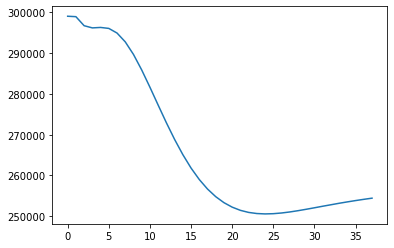

In [584]:
plt.plot(range(max_degree - 2), costs)

#### همانطور که مشخص است دقت روی مجموعه ی ولیدیشن از یک جایی افزایش می یابد و مدل به سمت اورفیت شدن می رود

In [585]:
print("degree with lowest error", degree)
print("lowest error is",resCost)

degree with lowest error 26
lowest error is 250573.91060398566


## نتیجه گیری

##### با اینکه مدل با درجه ی بالا قله و قعر های زیادی دارد اما چون بازه ی داده ها در حدود 300 روز است بنابراین دامنه ی این تابع وسعت زیادی ندارد و شاهد قله و قعر های زیادی نیست. بنابراین همانطور که از نتیجه ی داده های تست مشخص است مدل دارای عمومیت خوبی است و از اورفیت شدن آن با چند دسته شدن داده ها جلوگیری شده است